In [1]:
# Importing required libs.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

%matplotlib inline

In [2]:
data_df = pd.read_csv("all_data.csv")
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


#### 1. Data Cleaning and Preparation

In [3]:
# Checking for empty data
# Renaming the Life expectancy at birth (years) column
data_df.rename(columns={"Life expectancy at birth (years)":"Life_expectancy"},inplace=True)
print(data_df.isnull().sum())

Country            0
Year               0
Life_expectancy    0
GDP                0
dtype: int64


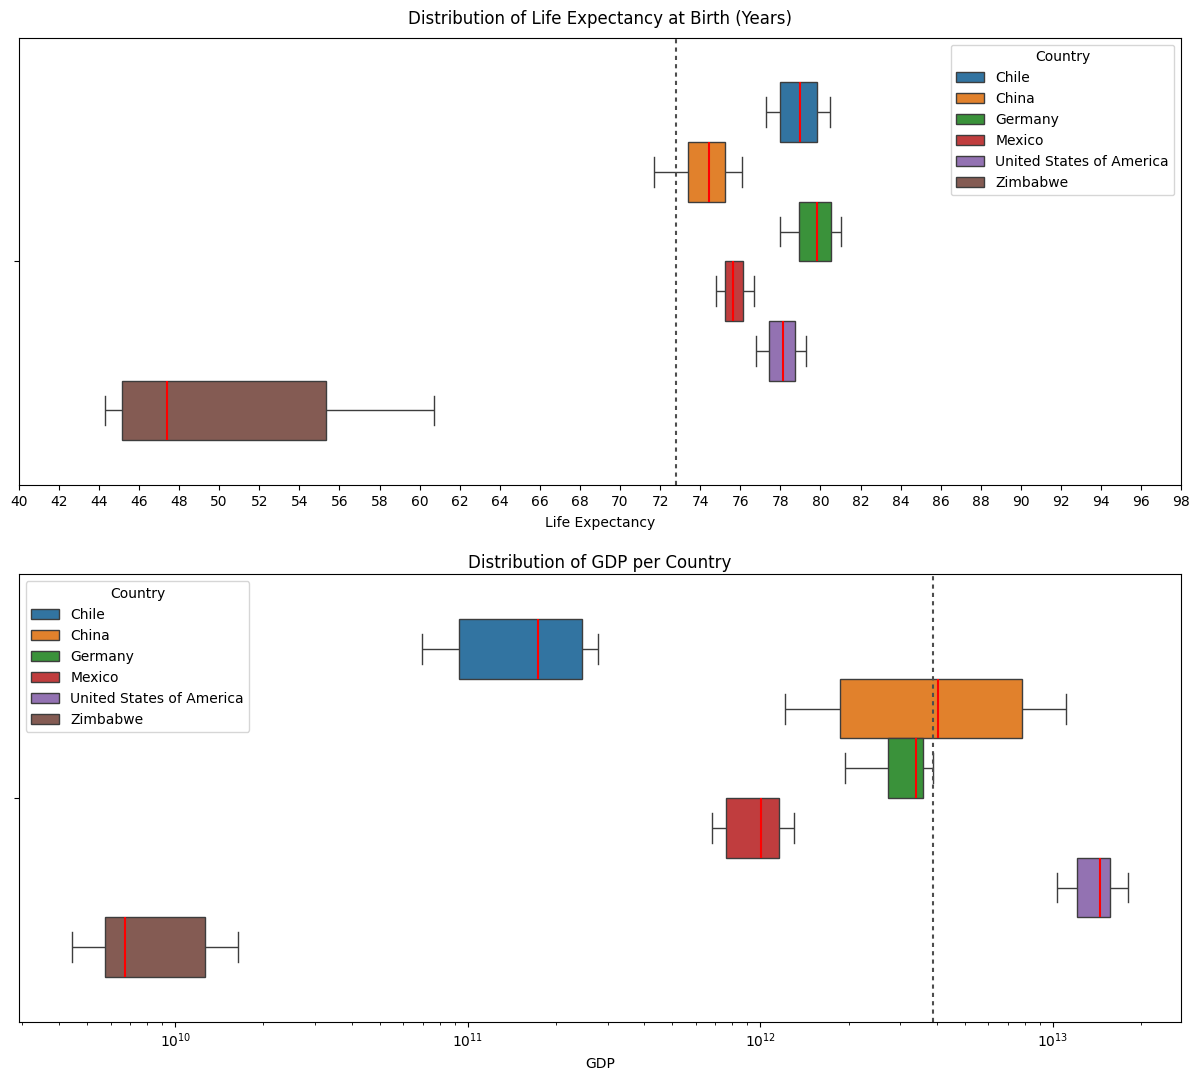

<Figure size 640x480 with 0 Axes>

In [4]:
def box_plot():
    f,ax = plt.subplots(2,1,figsize=(15,6))
    fig = sns.boxplot(ax=ax[0],data=data_df,x="Life_expectancy",hue="Country"
                      ,medianprops={"color":"r","linewidth":1.5},native_scale=True,flierprops={"marker":"x"})
    fig.axvline(np.mean(data_df["Life_expectancy"]),color=".3",dashes=(2,2))
    fig.set_title("Distribution of Life Expectancy at Birth (Years)",pad=10)
    fig.set_xlabel("Life Expectancy",labelpad=5)
    fig.set_xticks(np.arange(40,100,2))

    fig_2 = sns.boxplot(ax=ax[1],data=data_df,x="GDP",hue="Country",
                        medianprops={"color":"r","linewidth":1.5},log_scale=True)
    fig_2.axvline(np.mean(data_df["GDP"]),color=".3",dashes=(2,2))
    fig_2.set_title("Distribution of GDP per Country",pad=5)
    fig_2.set_xlabel("GDP",labelpad=5)
    plt.subplots_adjust(top=1.75)
    plt.show()
    plt.clf()
    
box_plot()

Observations:
As we can see from the above plots, the distribution of life expectancy at birth seems to have a mean of around 73 years with most of the countries falling above the mean except for Zimbawe. Most of the means seem to be falling around the 80 year mark while the lowest seems to be around 47 years. Some observations seem to be proven, as higher income countries/developed countries are above the mean. Poorer countries are well below the mean and thus have lower life expectancy.

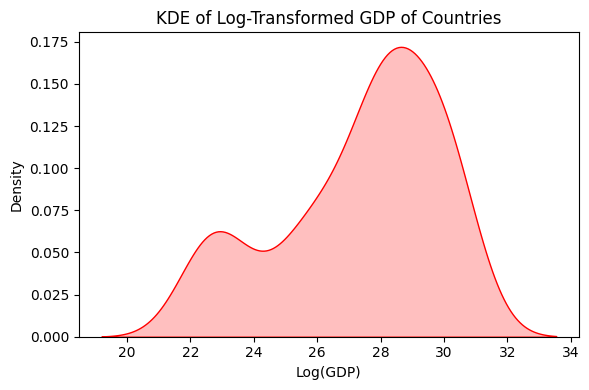

<Figure size 640x480 with 0 Axes>

In [5]:
# Visualize log-transformed data using KDE plot
plt.figure(figsize=(6,4))
sns.kdeplot(np.log(data_df["GDP"]), fill=True, color='red')
plt.title("KDE of Log-Transformed GDP of Countries")
plt.xlabel('Log(GDP)')
plt.ylabel('Density')
plt.tight_layout()
plt.show()
plt.clf()

Observations:
By using a dataset with such scaled data points, the log transformation effectively normalizes the distribution, making the dataset more suitable for analysis without the unreadibility caused by huge scaled data. The KDE plots clearly show how the log transformation normalizes the data.

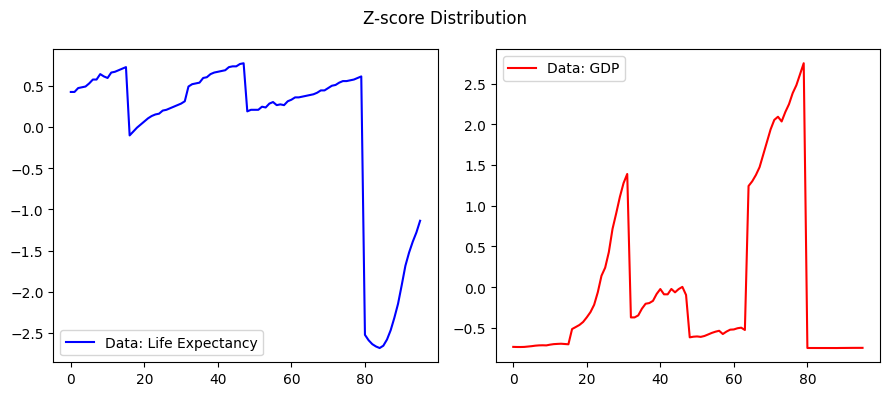

Life Expectancy - Original Data: 72.78958333333334
Life Expectancy - Filtered Data: 72.78958333333334
GDP - Original Data: 3880498570768.396
GDP - Filtered Data: 3880498570768.396


In [6]:
# Using Z-Scores for Identifying Outliers:
data_life_exp = data_df["Life_expectancy"].to_numpy()
data_gdp = data_df["GDP"].to_numpy()

# Calculate the z-score
z_score_life_exp = ss.zscore(data_life_exp)
z_score_GDP = ss.zscore(data_gdp)

# Outlier threshold (typically is +-3)
outlier_thresh = 3.0

# Identify outliers based on threshold
outliers_mask = np.abs(z_score_life_exp) > outlier_thresh
outliers_mask_gdp = np.abs(z_score_GDP) > outlier_thresh

# Visualise the dataset
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(9,4))
ax1.plot(np.arange(len(data_life_exp)),z_score_life_exp,c="b",label="Data: Life Expectancy")
ax1.legend()

ax2.plot(np.arange(len(data_gdp)),z_score_GDP,c="r",label="Data: GDP")
ax2.legend()

fig.suptitle("Z-score Distribution")
fig.tight_layout()
plt.show()

# Remove outliers from the dataset
filtered_data = data_life_exp[~outliers_mask]
filtered_data_GPD = data_gdp[~outliers_mask_gdp]

print(f"Life Expectancy - Original Data: {np.mean(data_life_exp)}")
print(f"Life Expectancy - Filtered Data: {np.mean(filtered_data)}")
print(f"GDP - Original Data: {np.mean(data_gdp)}")
print(f"GDP - Filtered Data: {np.mean(filtered_data_GPD)}")


Observations:
It would seem that the quantitative data variables do not have high outliers in there data set. Using the data as is should not effect the analysis to a huge degree.

#### 2. Univariate Analysis

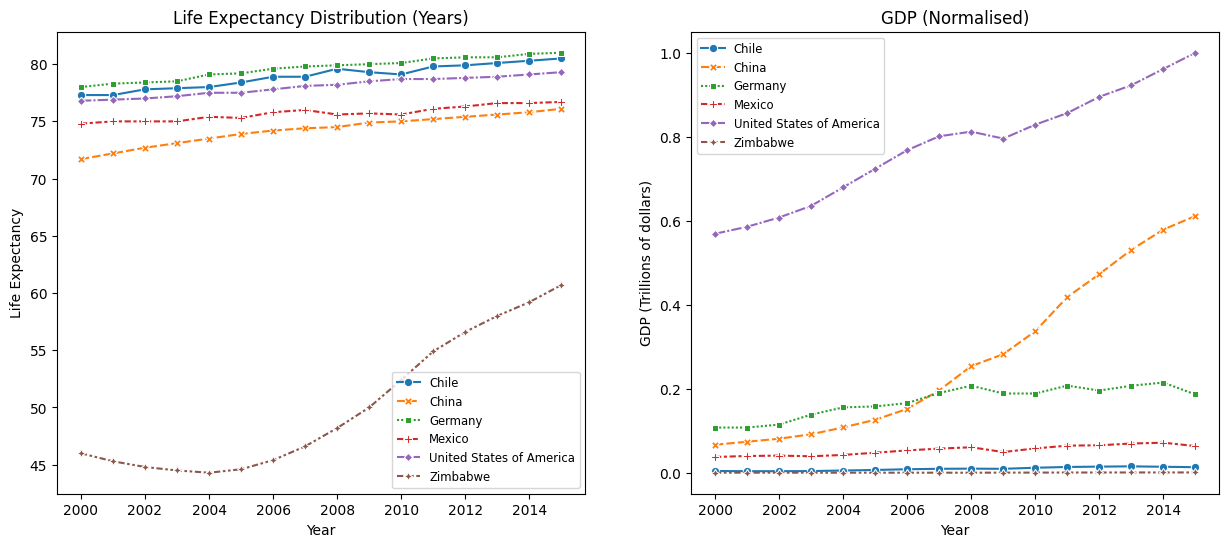

<Figure size 640x480 with 0 Axes>

In [7]:
# Has life expectancy increased over time in the six nations?
fig,ax = plt.subplots(1,2,figsize=(15,6),sharex=True)
lifeplot = sns.lineplot(ax=ax[0],data=data_df,x="Year",y="Life_expectancy",hue="Country",style="Country",markers=True)
lifeplot.set(title="Life Expectancy Distribution (Years)",ylabel="Life Expectancy")
lifeplot.legend(loc="lower right",fontsize="small")
    
# Has GDP increased over time in the six nations?
# Normalising the data to a scale of 0 to 1 for readability
data_df["GDP_Normalised"] = data_df["GDP"].transform(lambda x: (x-min(x))/(max(x)-min(x)))
gdp_plot = sns.lineplot(ax=ax[1],data=data_df,x="Year",y="GDP_Normalised",hue="Country",style="Country",markers=True)
gdp_plot.set(title="GDP (Normalised)",ylabel="GDP (Trillions of dollars)")
gdp_plot.legend(loc='upper left',fontsize="small")

plt.show()
plt.clf()

Observations:
Here we explored the change/distribution of life expectancy and GDP over time with a line plot. According to this data set, we can see how over time as the GDP of a country has gone up there has been an increase in the Life expectancy in that country, albeit, mariginally. Upon a closer look, Zimbawe does stand out as despite an overall low increase in GDP, there has been a significant amount of increase in Life expectancy post 2005. 

Lets take a look at the average life expectancy per country at the plot below. The average seems to be fairly close regardless of the income level of that country.

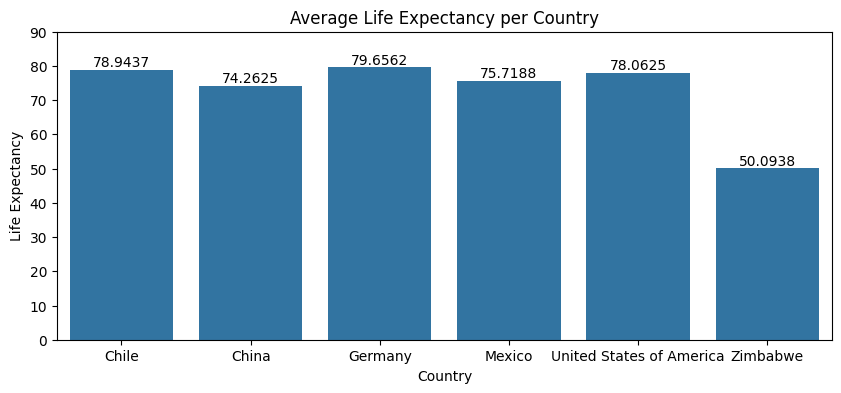

<Figure size 640x480 with 0 Axes>

In [8]:
#What is the average life expectancy in these nations?
f,ax = plt.subplots(figsize=(10,4))
data = data_df.groupby("Country")["Life_expectancy"].mean().reset_index()
# print(data)

#What is the distribution of that life expectancy?
bar_plot = sns.barplot(data=data,x="Country",y="Life_expectancy")
bar_plot.bar_label(ax.containers[0], fontsize=10)
ax.set(title="Average Life Expectancy per Country",ylabel="Life Expectancy",yticks=np.arange(0,100,10))
plt.show()
plt.clf()

#### 3. Bivariate Analysis

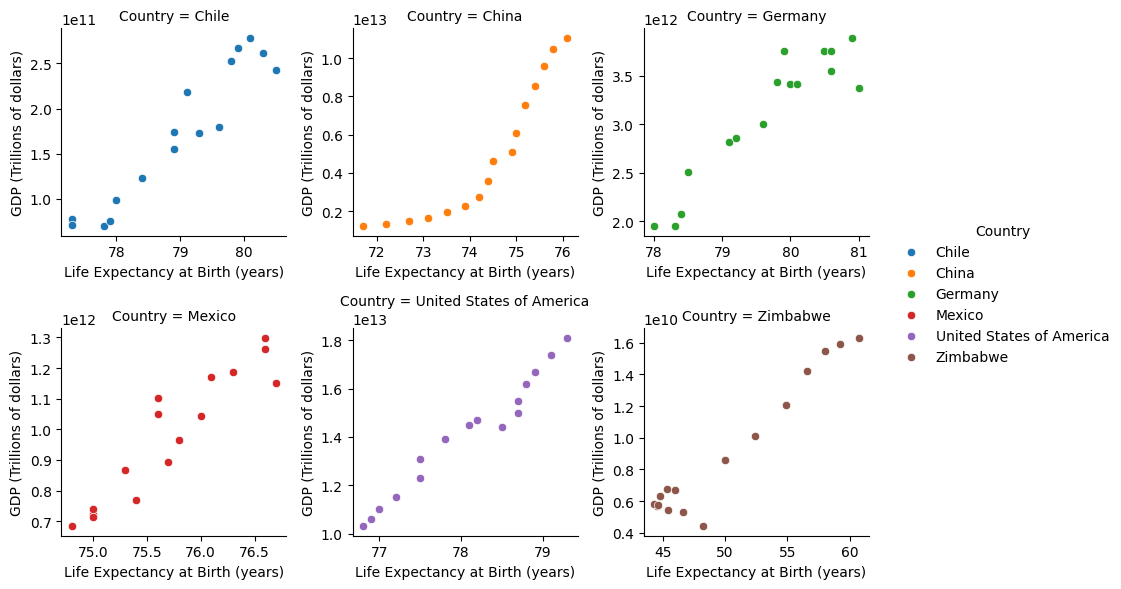

<Figure size 640x480 with 0 Axes>

In [9]:
# Scatter Plot: Create a scatter plot of Life Expectancy vs. GDP to visually explore the relationship between the two variables.

g = sns.FacetGrid(data_df,col="Country",hue="Country",col_wrap=3,sharex=False,sharey=False)
g = g.map(sns.scatterplot,"Life_expectancy","GDP",edgecolor="w").add_legend()
g.set(xlabel="Life Expectancy at Birth (years)")
g.set(ylabel="GDP (Trillions of dollars)")
g.tight_layout()
plt.show()
plt.clf()


Observations:

The plots above shows the relationship between the life expectancy of the countries with their respective GDP per capita. Variables used to plot this chart are as follows: GDP per capita (on y-axis), life expectancy (on x-axis). 

Although we cannot deny the role of other factors along with the GDP, but, with the available data, countries with the higher GDP performed better in terms of life expectancy. Looking at Zimbawe there does seem to be other factors as despite a minute increase in GDP, the life expectancy has increased, perhaps due to donations of medical resources or advancements of medicine itself.

In [142]:
def calculate_regression(country):
    result = {}
    for countries in country:
        x = data_df.loc[data_df["Country"]==countries,"GDP"]
        y = data_df.loc[data_df["Country"]==countries,"Life_expectancy"]
        model = ss.linregress(x,y)
        result[countries] = (model.slope,model.intercept)
    return result

regress = calculate_regression(data_df["Country"].unique())
for country,(slope,intercept) in regress.items():
    print(f"Country: {country} \nSlope is {slope:.13f}, intercept is {intercept:.4f}")


Country: Chile 
Slope is 0.0000000000131, intercept is 76.7223
Country: China 
Slope is 0.0000000000003, intercept is 72.5669
Country: Germany 
Slope is 0.0000000000014, intercept is 75.4399
Country: Mexico 
Slope is 0.0000000000028, intercept is 73.0209
Country: United States of America 
Slope is 0.0000000000003, intercept is 73.3336
Country: Zimbabwe 
Slope is 0.0000000013353, intercept is 37.9925


Pearsonr Coffecient: 0.34320674844915594
intercept: 70.05478412327241
slope: 7.047545979431692e-13


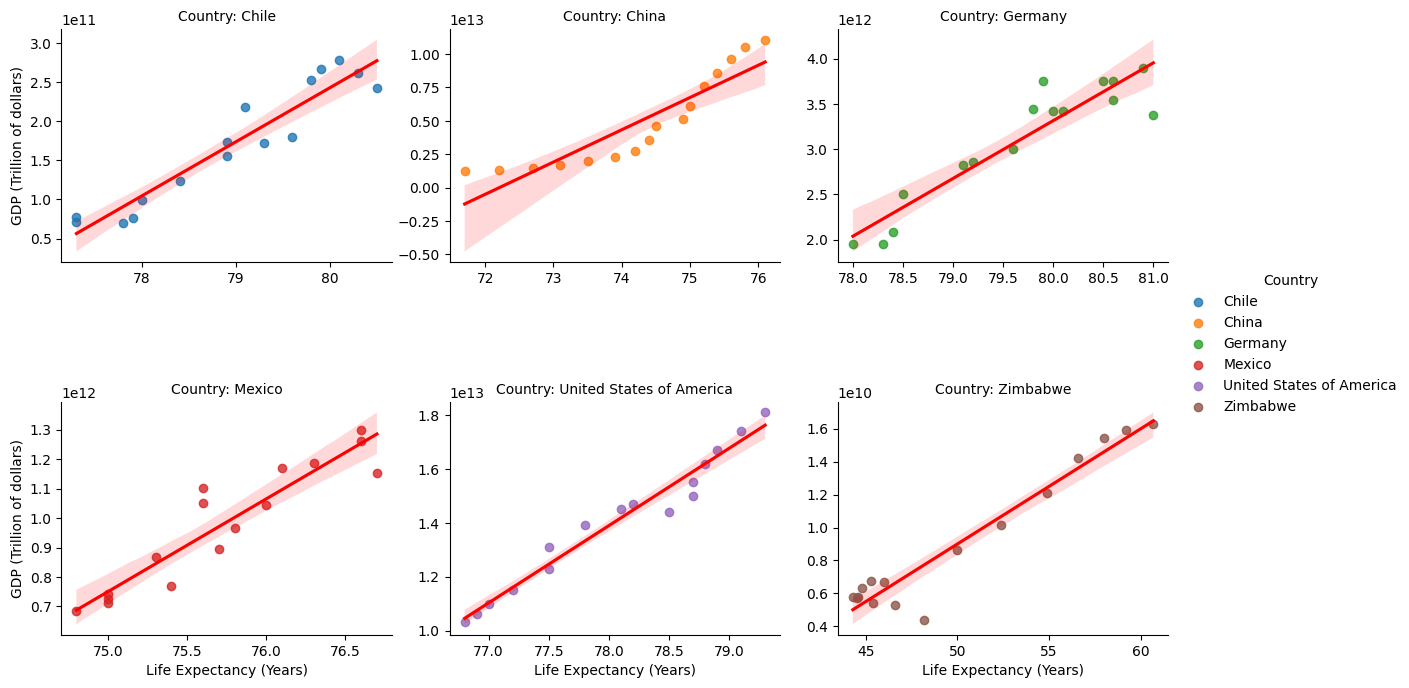

<Figure size 640x480 with 0 Axes>

In [49]:
# Correlation Analysis: 
# Regression Analysis: 
# Fit a regression line to the data to model the relationship and make predictions.
gdp = data_df["GDP"]
life = data_df["Life_expectancy"]
slope,intercept,r_value,p_value,std_error = ss.linregress(gdp,life)

print(f"Pearsonr Coffecient: {r_value}")
print(f"intercept: {intercept}")
print(f"slope: {slope}")

# Calculate the correlation coefficient (Pearson or Spearman) to quantify the strength and direction of the linear relationship.
g = sns.FacetGrid(data_df, col="Country", hue="Country",col_wrap=3, height=4, sharex=False, sharey=False) 

# Map the scatter plot with regression line 
g.map(sns.regplot, "Life_expectancy", "GDP",marker="o",lowess=False
      ,line_kws={"color": "red"}).add_legend()

# Add titles 
g.set_ylabels("GDP (Trillion of dollars)")
g.set_xlabels("Life Expectancy (Years)")
g.set_titles(col_template="Country: {col_name}", row_template="{row_name}")
g.figure.subplots_adjust(hspace=0.6,bottom=0.2)

plt.show()
plt.clf()    


Observarions:
As we an see from the liner regression model using scipy, the pearsonr correlation coefficient is closer to 0 giving a weaker but positive correlation. Despite there being some association between the two variables perhaps in this data set they are not as closely associated as it could be. 
A larger data set might be able efficiently determine the results better.

#### Extra: Machine learning Model

In [11]:
# Data cleaning and pre-processing

data_df["Country"] = data_df["Country"].astype('category')
data_df["Year"] = pd.to_datetime(data_df["Year"],format="%Y")
# Check summary statistics
data_df.describe().style.background_gradient(cmap="Blues")

,Year,Life_expectancy,GDP,GDP_Normalised
count,96,96.000000,96.000000,96.000000
mean,2007-07-02 18:00:00,72.789583,3880498570768.395996,0.214200
min,2000-01-01 00:00:00,44.300000,4415702800.000000,0.000000
25%,2003-10-01 18:00:00,74.475000,173301750000.000000,0.009333
50%,2007-07-02 12:00:00,76.750000,1280220000000.000000,0.070504
75%,2011-04-02 06:00:00,78.900000,4067510000000.000000,0.224535
max,2015-01-01 00:00:00,81.000000,18100000000000.000000,1.000000
std,nan,10.672882,5197561310975.916992,0.287228


Insights:
1. The variance of the life expectancy seems to be moderately spread across the mean. However, with a larger data set the deviation should decrease.
2. The variance in the GDP(trillions) seems to be quite large greater than the mean itself.  

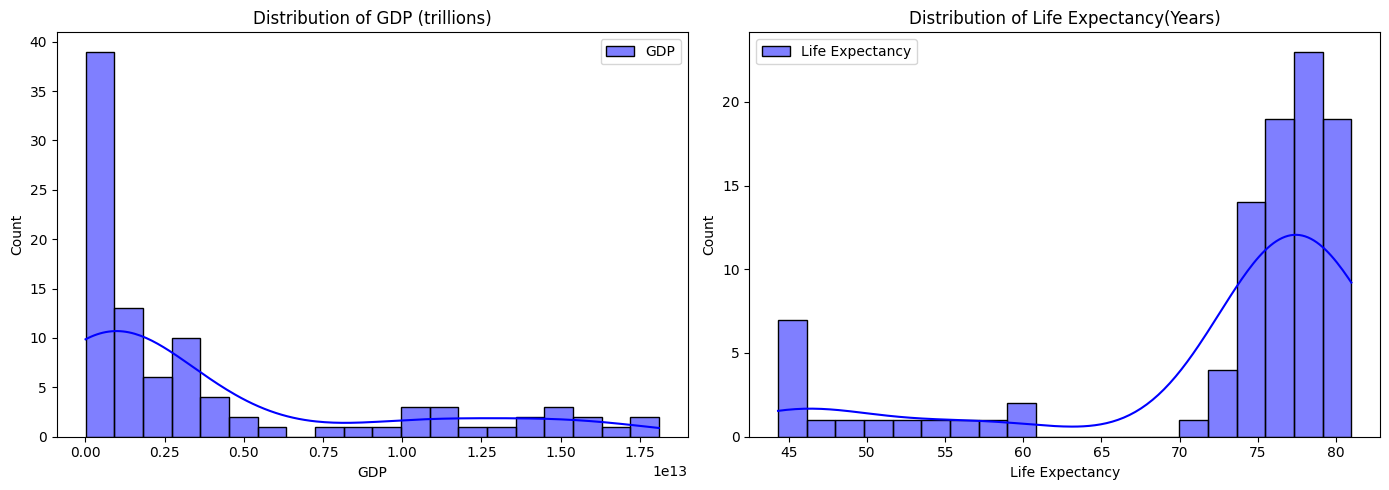

In [12]:
# Distribution of the quantitative variables.

f,ax = plt.subplots(1,2,figsize=(14,5))
fig = sns.histplot(data_df['GDP'],bins=20, kde=True, color='blue', label='GDP',ax=ax[0])
fig.set_xlabel('GDP')
fig.set_ylabel('Count')
fig.set_title('Distribution of GDP (trillions)')
fig.legend()

fig_2 = sns.histplot(data_df['Life_expectancy'],bins=20, kde=True, color='blue', label='Life Expectancy',ax=ax[1])
fig_2.set_xlabel('Life Expectancy')
fig_2.set_ylabel('Count')
fig_2.set_title('Distribution of Life Expectancy(Years)')
fig_2.legend()

plt.tight_layout()
plt.show()

In [45]:
# Explore machine learning models to predict Life Expectancy based on GDP and other relevant features
# Separate the features (X) and target variable (y)
x = data_df["GDP"].to_numpy().reshape(-1,1)
y = data_df["Life_expectancy"].to_numpy()

# Create a linear regression model
model = LinearRegression().fit(x,y)

# Make predictions on the testing set
y_pred = model.predict(x)

# Evaluate the model
r_sq = model.score(x, y)

print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")


coefficient of determination: 0.11779087218104212
intercept: 70.05478412327241
slope: [7.04754598e-13]


The value of the intercept is approximately `70.05`. This illustrates that the model predicts this wjen x is zero. The value of the slope at `[7.04754598e-13]` means that the predicted response rises that number when x is increased by one.

#### Conclusions:
In this dataset we have analysed the GDP (Gross Domestic Product) of a country and its relationship with life expectancy using a Simple Linear Regression model. We tried to establish a correlation between these two varaibles to determine if a developing vs developed country plays a role. Although the data here is very limited there doesnt seem to be a strong relationship between them. 
There are many factors which can augment and attribute to these variables which have not been analysed and such findings cannot be drawn conclusively. 
In other aspects, a higher income country does seem to enjoy a longer life expectancy due to perhaps better medical infrastructure comparitively to its counterparts. It being greater than the overall mean does provide some insight. 